In [65]:
import pandas as pd
import matplotlib.pyplot as plt

lm_path = f"./language_modeling.csv"
mcp_path = f"./multiple_choice_prompt.csv"
poe_path = f"./process_of_elimination.csv"
lm_df = pd.read_csv(lm_path)
mcp_df = pd.read_csv(mcp_path)
poe_df = pd.read_csv(poe_path)


In [66]:
def process(df):
    # get rid of identical rows 
    df = df.drop_duplicates()
    # select from lm_df where checkpoint is google/flan-t5-small or google/flan-t5-xl
    df = df[df["checkpoint"].isin(["google/flan-t5-small", "google/flan-t5-xl"])]
    # remove the seed column and batch_size column
    df = df.drop(columns=["model_family", "seed", "batch_size"])
    return df
    

In [67]:
lm_df = process(lm_df)
mcp_df = process(mcp_df)
poe_df = process(poe_df)
# concatenate the three dataframes
df = pd.concat([lm_df, mcp_df, poe_df])
df

,checkpoint,dataset,method,accuracy
0,google/flan-t5-small,cqa,language_modeling,0.2916
1,google/flan-t5-small,cqa,average_language_modeling,0.3145
2,google/flan-t5-small,copa,language_modeling,0.5960
3,google/flan-t5-small,copa,average_language_modeling,0.6100
16,google/flan-t5-xl,cqa,language_modeling,0.6167
17,google/flan-t5-xl,cqa,average_language_modeling,0.5340
18,google/flan-t5-xl,copa,language_modeling,0.8180
19,google/flan-t5-xl,copa,average_language_modeling,0.7800
0,google/flan-t5-small,cqa,multiple_choice_prompt,0.3620
1,google/flan-t5-small,cqa,average_language_modeling,0.3620


In [73]:
# select rows where checkpoint is google/flan-t5-xl
df[df["checkpoint"] == "google/flan-t5-xl"]

,checkpoint,dataset,method,accuracy
16,google/flan-t5-xl,cqa,language_modeling,0.6167
17,google/flan-t5-xl,cqa,average_language_modeling,0.5340
18,google/flan-t5-xl,copa,language_modeling,0.8180
19,google/flan-t5-xl,copa,average_language_modeling,0.7800
24,google/flan-t5-xl,cqa,multiple_choice_prompt,0.8714
25,google/flan-t5-xl,copa,multiple_choice_prompt,0.9480
20,google/flan-t5-xl,cqa,process_of_elimination,0.8305
21,google/flan-t5-xl,copa,process_of_elimination,0.7800


<AxesSubplot:xlabel='dataset'>

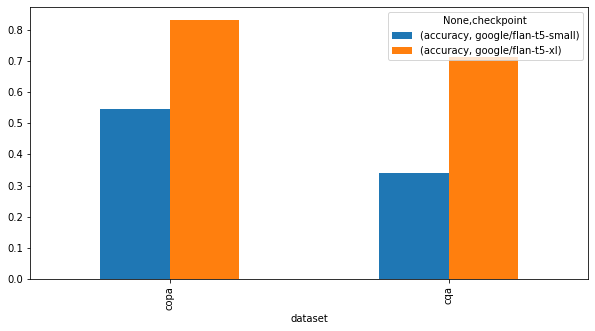

In [72]:
# plot the results, grouped by dataset and checkpoint
df.groupby(["dataset", "checkpoint"]).mean().unstack().plot(kind="bar", figsize=(10, 5))
